In [1]:
import math
import statistics

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [21]:
from hdbscan import HDBSCAN

In [3]:
data, target = make_blobs(n_samples=500, cluster_std=1, centers=5)
df = pd.concat([pd.DataFrame(data, columns=['x', 'y']), pd.Series(target).rename('target')], axis=1)

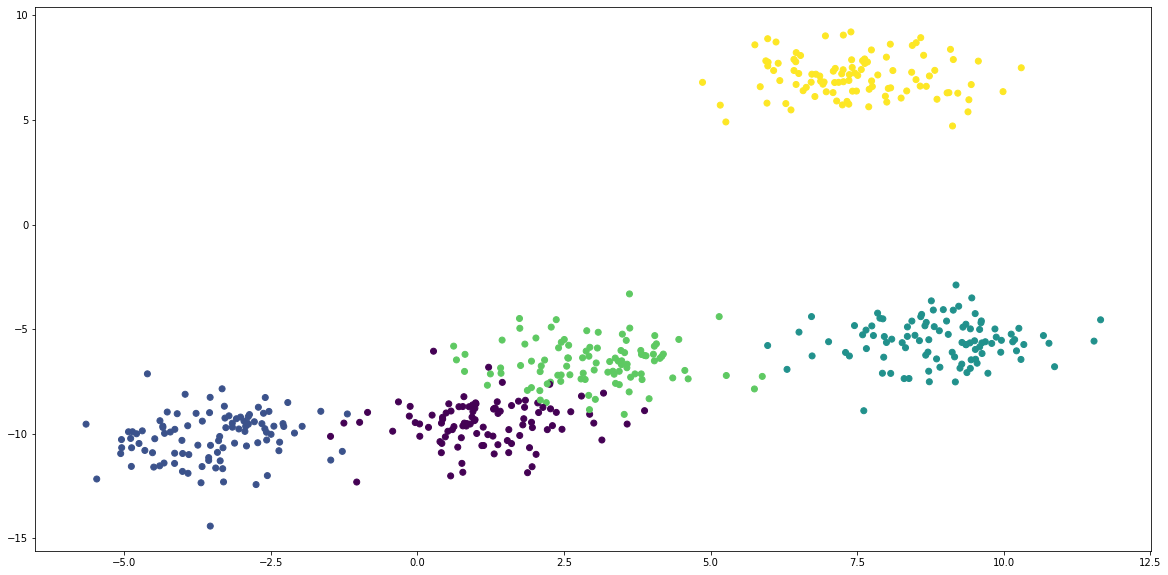

In [4]:
plt.figure(figsize=(20, 10))
plt.scatter(df['x'], df['y'], c=df['target']);

In [5]:
kmean = KMeans(n_clusters=5)
prediction = pd.Series(kmean.fit_predict(df.iloc[:, :2]), name='predicted')

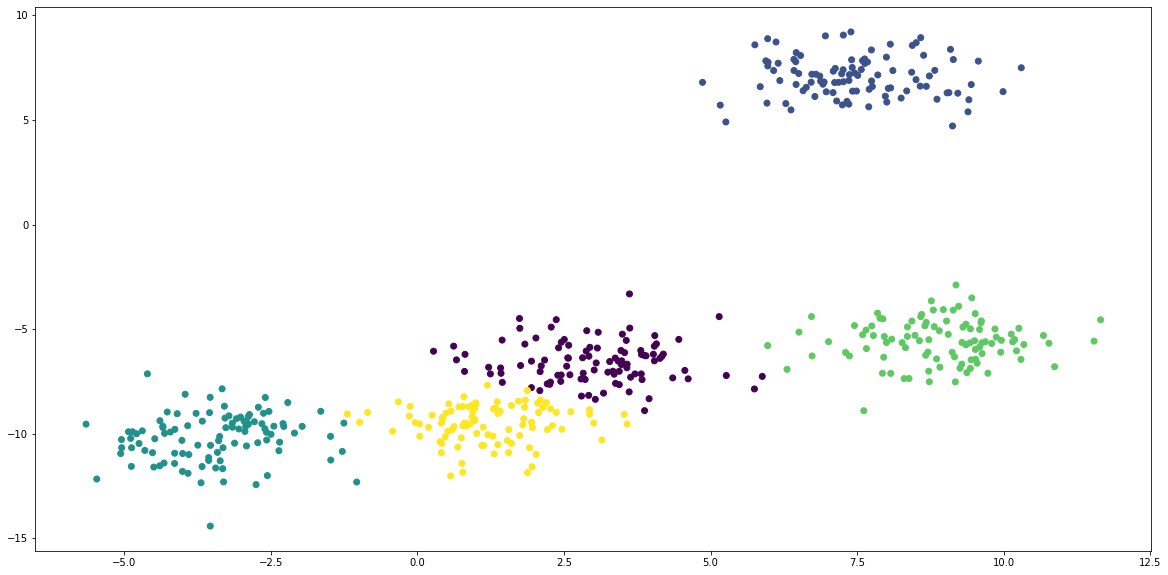

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(df['x'], df['y'], c=prediction);

In [7]:
scores = {}
for i in range(2, 16):
    kmean = KMeans(n_clusters=i)
    prediction = pd.Series(kmean.fit_predict(df.iloc[:, :2]), name='predicted')
    scores[i] = silhouette_score(df.iloc[:, :2], prediction)

<AxesSubplot:>

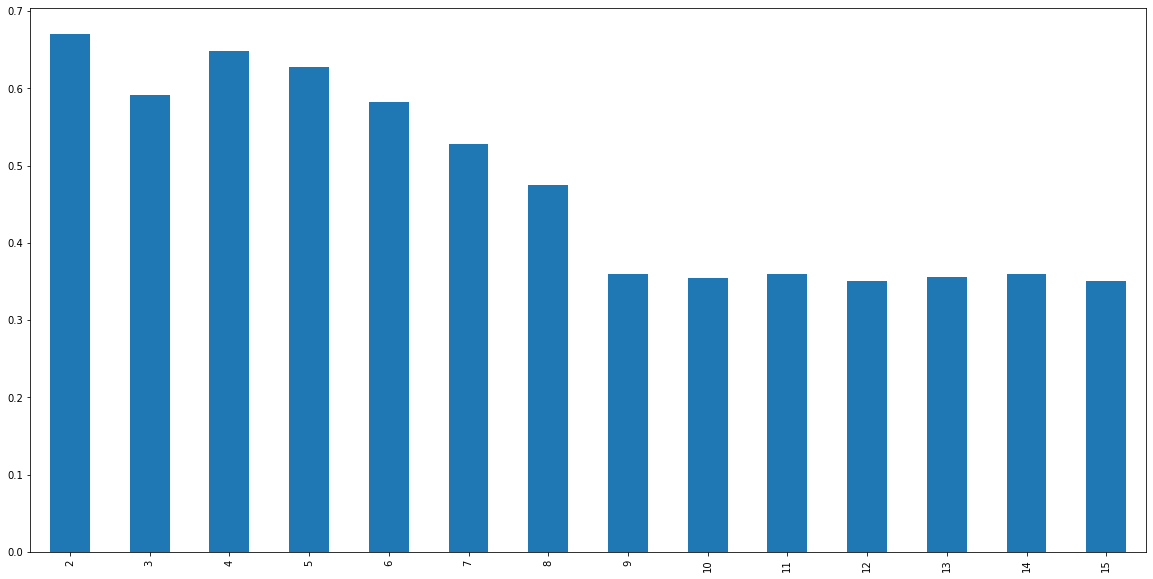

In [8]:
pd.Series(scores).plot(kind='bar', figsize=(20, 10))

In [15]:
dbscan = DBSCAN(eps=1)
prediction = pd.Series(dbscan.fit_predict(df.iloc[:, :2]), name='predicted')

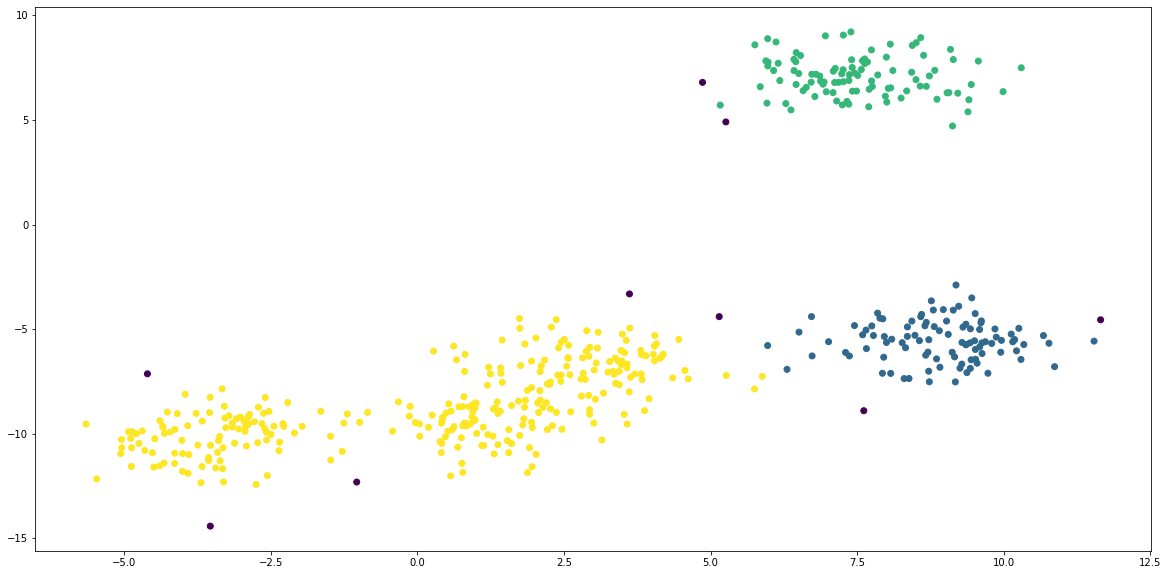

In [16]:
plt.figure(figsize=(20, 10))
plt.scatter(df['x'], df['y'], c=prediction);

In [18]:
prediction.unique()

array([ 0,  1,  2, -1])

In [43]:
hdbscan = HDBSCAN()
prediction = pd.Series(hdbscan.fit_predict(df.iloc[:, :2]), name='predicted')

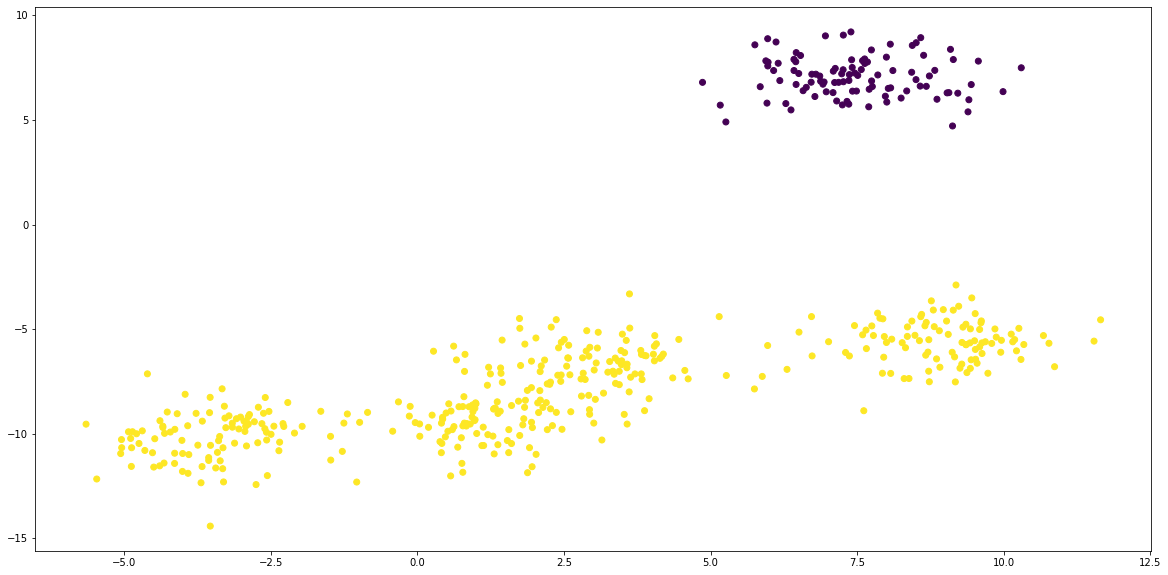

In [44]:
plt.figure(figsize=(20, 10))
plt.scatter(df['x'], df['y'], c=prediction);